# Key Metrics for Evaluating Models

Evaluating a machine learning model is critical to understanding its performance. Different models require different evaluation metrics depending on whether the task is regression, classification, or clustering. In this notebook, we will explore key metrics used to evaluate supervised and unsupervised learning models.

## Table of Contents

1. [Classification Metrics](#1-classification-metrics)
2. [Regression Metrics](#2-regression-metrics)
3. [Clustering Metrics](#3-clustering-metrics)
4. [Dimensionality Reduction Metrics](#4-dimensionality-reduction-metrics)

---

## 1. Classification Metrics

### Description:
Classification metrics help assess the performance of classification models, which predict discrete labels. Common metrics include accuracy, precision, recall, F1-score, and AUC-ROC.

### Usage Areas:
- Binary classification
- Multi-class classification
- Medical diagnostics
- Fraud detection

In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 300,n_classes =2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state = 42)

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

Accuracy: 0.8444444444444444
Precision: 0.8837209302325582
Recall: 0.8085106382978723
F1-Score: 0.8444444444444444
AUC-ROC: 0.8461157842652153


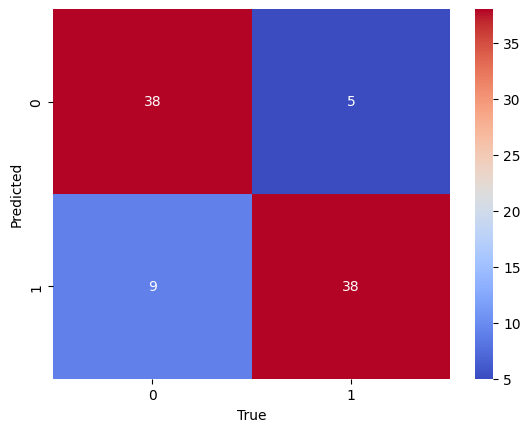

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

corr = confusion_matrix(y_test,y_pred)
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## 2. Regression Metrics
Regression metrics assess models that predict continuous values. Common metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score.

### Usage Areas:
- Predicting housing prices
- Stock market forecasting
- Sales prediction

In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X,y= make_regression(n_samples=300,noise=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test,y_pred,squared=False)
R2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R² Score: {R2}")

Mean Absolute Error: 0.22872372337736813
Mean Squared Error: 0.07946678193578234
Root Mean Squared Error: 0.2818985312763838
R² Score: 0.9999970698886276


## 3. Clustering Metrics
Clustering metrics evaluate the performance of unsupervised learning models that group data into clusters. Popular metrics include Silhouette Score, Davies-Bouldin Index, and Adjusted Rand Index (ARI).

### Usage Areas:
- Market segmentation
- Document clustering
- Image segmentation

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y_true = make_blobs(n_samples=300,centers = 5,random_state=42)
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X)

silhouette = silhouette_score(X, y_kmeans)
db_score = davies_bouldin_score(X, y_kmeans)
ari = adjusted_rand_score(y_true, y_kmeans)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {db_score}")
print(f"Adjusted Rand Index: {ari}")

Silhouette Score: 0.6586478247336219
Davies-Bouldin Index: 0.49323365269520353
Adjusted Rand Index: 0.966921368753416


## 4. Dimensionality Reduction Metrics
Dimensionality reduction metrics assess how well a model reduces the number of features while preserving the structure of the data. Reconstruction Error and Explained Variance are common metrics used in PCA and Autoencoders.

### Usage Areas:
- Data visualization
- Feature extraction
- Reducing computational complexity

In [12]:
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each principal component: {explained_variance}")

Explained Variance by each principal component: [0.54303187 0.45696813]
